In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
filepath = "/mnt/data-storage/yaguangli2023/stellar-models/grid_models_surface_effect_uncorrected/dataset-old.h5"
test_data = pd.read_hdf(filepath, "test")
test_data = test_data.reset_index()
test_data.head()

,index,track,star,star_mass,Yinit,Zinit,amlt,fov_core,fov_shell,star_age,...,log_g,log_L,delta_X,f_nuc,phase,EEP,bol_mag,abs_G,abs_BP,abs_RP
0,7,7000,8,0.92329,0.279311,0.001829,1.608258,0.0,0.006041,5.405171e+07,...,4.496376,0.078459,0.003644,1.000889,0,0.001982,4.553852,4.538610,4.761750,4.151341
1,22,7000,23,0.92329,0.279311,0.001829,1.608258,0.0,0.006041,7.720014e+08,...,4.468495,0.116195,0.079764,0.999808,0,0.022920,4.459513,4.444757,4.663875,4.062834
2,24,7000,25,0.92329,0.279311,0.001829,1.608258,0.0,0.006041,8.675000e+08,...,4.465266,0.120890,0.090904,0.999808,0,0.025527,4.447776,4.433104,4.651625,4.051969
3,25,7000,26,0.92329,0.279311,0.001829,1.608258,0.0,0.006041,9.247991e+08,...,4.463313,0.123724,0.097724,0.999807,0,0.027101,4.440689,4.426066,4.644227,4.045407
4,30,7000,31,0.92329,0.279311,0.001829,1.608258,0.0,0.006041,1.184983e+09,...,4.454285,0.136767,0.129670,0.999808,0,0.034342,4.408082,4.393675,4.610197,4.015184


In [3]:
rename_cols = {
    "EEP": "evol",
    "log_star_mass": "log_mass",
    "star_mass": "mass",
    "Zinit": "Z",
    "Yinit": "Y",
    "amlt": "a_MLT",
    "log_Dnu_freq_o": "log_Dnu",
    "Dnu_freq_o": "Dnu",
    "radius": "R",
    "log_radius": "log_R"
}
test_data = test_data.rename(columns=rename_cols)
test_data.head()

,index,track,star,mass,Y,Z,a_MLT,fov_core,fov_shell,star_age,...,log_g,log_L,delta_X,f_nuc,phase,evol,bol_mag,abs_G,abs_BP,abs_RP
0,7,7000,8,0.92329,0.279311,0.001829,1.608258,0.0,0.006041,5.405171e+07,...,4.496376,0.078459,0.003644,1.000889,0,0.001982,4.553852,4.538610,4.761750,4.151341
1,22,7000,23,0.92329,0.279311,0.001829,1.608258,0.0,0.006041,7.720014e+08,...,4.468495,0.116195,0.079764,0.999808,0,0.022920,4.459513,4.444757,4.663875,4.062834
2,24,7000,25,0.92329,0.279311,0.001829,1.608258,0.0,0.006041,8.675000e+08,...,4.465266,0.120890,0.090904,0.999808,0,0.025527,4.447776,4.433104,4.651625,4.051969
3,25,7000,26,0.92329,0.279311,0.001829,1.608258,0.0,0.006041,9.247991e+08,...,4.463313,0.123724,0.097724,0.999807,0,0.027101,4.440689,4.426066,4.644227,4.045407
4,30,7000,31,0.92329,0.279311,0.001829,1.608258,0.0,0.006041,1.184983e+09,...,4.454285,0.136767,0.129670,0.999808,0,0.034342,4.408082,4.393675,4.610197,4.015184


In [4]:
test_data["L"] = 10**test_data["log_L"]
test_data["log_age"] = test_data["log_star_age"] - 9
test_data["age"] = 10**test_data["log_age"]

In [5]:
from celestify.star import Star

Holoviews not imported. Some visualizations will not be available.
PyMultiNest not imported.  MultiNest fits will not work.


In [6]:
star = Star()

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [7]:
from jax import vmap

In [8]:
param_names = ["evol", "log_mass", "M_H", "Y", "a_MLT"]
params = test_data[param_names].to_dict(orient="list")
params = {key: np.array(value) for key, value in params.items()}

In [9]:
determs = vmap(star)(params)

In [10]:
pred = pd.DataFrame.from_dict(determs, orient="columns")
pred.head()

,Dnu,R,Teff,age,log_Dnu,log_L,log_R,log_Teff,log_age,log_g,log_numax,mass,numax
0,147.700943,0.896195,6422.582520,0.053700,2.169383,0.090338,-0.047598,3.807710,-1.270022,4.498600,3.527300,0.92329,3367.438232
1,139.688965,0.929590,6438.464844,0.750919,2.145162,0.126407,-0.031708,3.808782,-0.124407,4.466823,3.494986,0.92329,3125.979004
2,139.082016,0.931834,6444.904785,0.854232,2.143271,0.130238,-0.030661,3.809216,-0.068424,4.464728,3.492675,0.92329,3109.385742
3,138.541183,0.933975,6447.300293,0.912275,2.141579,0.132877,-0.029665,3.809378,-0.039874,4.462735,3.490601,0.92329,3094.572021
4,136.467148,0.942169,6453.419434,1.171658,2.135028,0.142112,-0.025871,3.809790,0.068801,4.455148,3.482807,0.92329,3039.535156


In [11]:
pred["L"] = 10**pred["log_L"]

In [12]:
error = (test_data - pred).dropna(axis=1)

In [13]:
error.describe()

,Dnu,L,R,Teff,age,log_Dnu,log_L,log_R,log_Teff,log_age,log_g,mass
count,1.245775e+06,1.245775e+06,1.245775e+06,1.245775e+06,1.245775e+06,1.245775e+06,1.245775e+06,1.245775e+06,1.245775e+06,1.245775e+06,1.245775e+06,1.245775e+06
mean,2.829118e-02,-3.995686e-02,-2.936682e-03,-9.830363e-01,9.941564e-03,1.484631e-04,-8.458033e-04,-2.455274e-04,-8.841973e-05,5.220214e-04,4.912458e-04,-5.488168e-10
std,2.782974e-01,4.053613e-01,3.189881e-02,1.723132e+01,5.311817e-02,2.769434e-03,4.347122e-03,1.945523e-03,1.092561e-03,4.487387e-03,3.891046e-03,5.384289e-08
min,-5.806670e+00,-3.665578e+01,-2.457777e+00,-1.826985e+02,-9.334331e-01,-6.136623e-02,-8.946749e-02,-6.569117e-02,-1.515821e-02,-4.117665e-01,-7.936350e-02,-1.858521e-07
25%,-8.147182e-02,-1.233968e-01,-8.904691e-03,-1.124638e+01,-1.109743e-03,-1.283403e-03,-3.182289e-03,-1.331058e-03,-7.469493e-04,-4.720450e-04,-1.670514e-03,-3.257751e-08
50%,9.676156e-03,-9.917443e-03,-1.348966e-03,-1.264300e+00,1.035938e-03,1.898198e-04,-6.194322e-04,-2.499022e-04,-8.387907e-05,4.458073e-04,5.000068e-04,-2.288818e-10
75%,1.113405e-01,7.685286e-02,5.230556e-03,9.022647e+00,5.941094e-03,1.647307e-03,1.746648e-03,8.353496e-04,5.814038e-04,1.456494e-03,2.662260e-03,3.170013e-08
max,1.002372e+01,2.377974e+01,1.321721e+00,1.421455e+02,2.422364e+00,1.036571e-01,6.377987e-02,3.968188e-02,1.096157e-02,3.248221e-01,1.313825e-01,1.802826e-07


In [14]:
error.quantile([.16, .5, .84])

,Dnu,L,R,Teff,age,log_Dnu,log_L,log_R,log_Teff,log_age,log_g,mass
0.16,-0.148743,-0.224876,-0.014465,-16.395898,-0.002716,-0.002043,-0.004608,-0.001880,-0.001081,-0.000955,-0.002778,-4.833221e-08
0.50,0.009676,-0.009917,-0.001349,-1.264300,0.001036,0.000190,-0.000619,-0.000250,-0.000084,0.000446,0.000500,-2.288818e-10
0.84,0.197531,0.159836,0.009663,14.474955,0.012730,0.002388,0.002892,0.001389,0.000912,0.002074,0.003761,4.875183e-08


In [18]:
import seaborn as sns
from corner import corner

In [143]:
test_data.Teff

0          6370.652426
1          6406.896764
2          6412.301214
3          6415.560088
4          6430.401847
              ...     
1245770    4229.491840
1245771    4216.993323
1245772    4202.390817
1245773    4192.969247
1245774    4170.127283
Name: Teff, Length: 1245775, dtype: float64

In [144]:
mask = (test_data.age < 14.) & (test_data.Teff < 7500.)

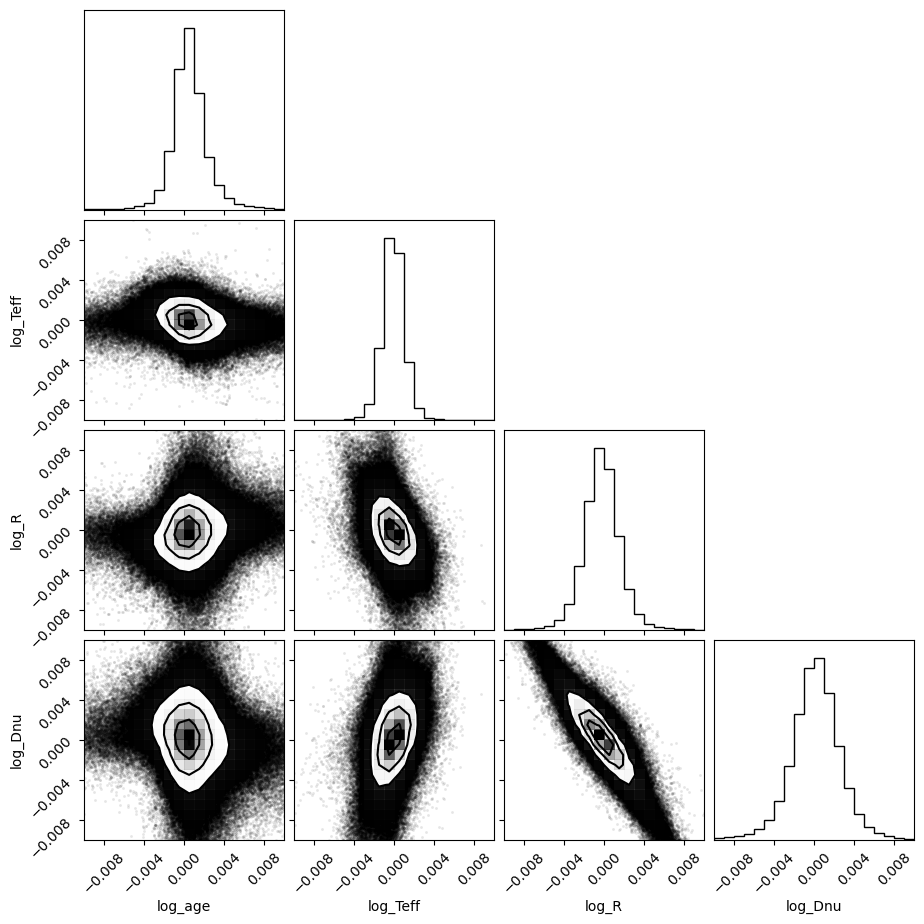

In [22]:
var_names = ["log_age", "log_Teff", "log_R", "log_Dnu"]
limits = [(-0.01, 0.01)] * 4
fig = corner(error, var_names=var_names, range=limits)

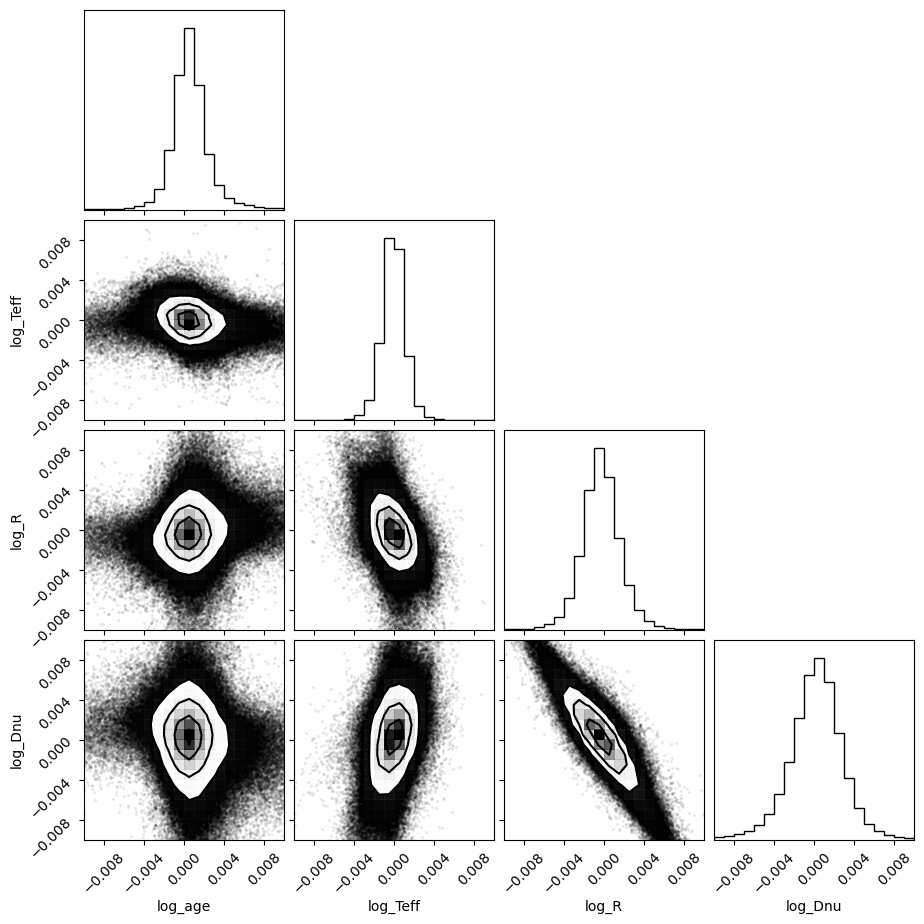

In [149]:
fig = corner(error.loc[mask, var_names].to_numpy(), labels=var_names, range=limits)

In [23]:
import numpyro
import numpyro.distributions as dist
import jax.numpy as jnp
from jax import random

In [112]:
def model(y):  # y has dimension N x d
    N = y.shape[0]
    d = y.shape[1]

    df = numpyro.sample("df", dist.Gamma(2.0, 0.1))
    mu = numpyro.sample("mu", dist.Normal(jnp.zeros(d), 0.01))
    # Vector of variances for each of the d variables
    theta = numpyro.sample("theta", dist.HalfCauchy(jnp.ones(d)))
    # Lower cholesky factor of a correlation matrix
    concentration = jnp.ones(1)  # Implies a uniform distribution over correlation matrices
    L_omega = numpyro.sample("L_omega", dist.LKJCholesky(d, concentration))
    # Lower cholesky factor of the covariance matrix
    sigma = jnp.sqrt(theta)
    # we can also use a faster formula `L_Omega = sigma[..., None] * L_omega`
    L_Omega = sigma[..., None] * L_omega
    # L_Omega = jnp.matmul(jnp.diag(sigma), L_omega)
    # precision = numpyro.sample("precision", dist.Gamma(df/2, df/2))

    # obs = numpyro.sample("obs", dist.MultivariateNormal(mu, scale_tril=L_Omega/precision**0.5), obs=y)
    with numpyro.plate("observations", N):
        obs = numpyro.sample("obs", dist.MultivariateStudentT(df, mu, scale_tril=L_Omega), obs=y)
        # obs = numpyro.sample("obs", dist.MultivariateNormal(mu, scale_tril=L_Omega/precision**0.5), obs=y)
    return obs

In [100]:
from numpyro.infer import Predictive, SVI, Trace_ELBO
from numpyro.infer.autoguide import AutoDelta

In [113]:
rng_key = random.PRNGKey(0)
guide = AutoDelta(model)
optimizer = numpyro.optim.Adam(step_size=5e-3)
svi = SVI(model, guide, optimizer, loss=Trace_ELBO())
svi_result = svi.run(rng_key, 5000, error[var_names].to_numpy())

100%|██████████| 5000/5000 [04:17<00:00, 19.41it/s, init loss: 4689421.5000, avg. loss [4751-5000]: -25639257.9840]


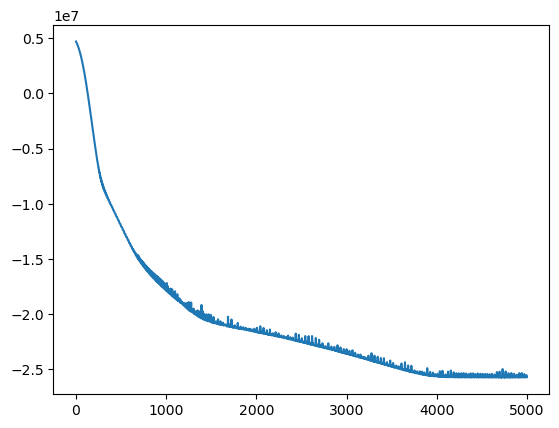

In [114]:
plt.plot(svi_result.losses);

In [115]:
L_omega = svi_result.params["L_omega_auto_loc"]
sigma = jnp.sqrt(svi_result.params["theta_auto_loc"])
L_Omega = jnp.matmul(jnp.diag(sigma), L_omega)
mu = svi_result.params["mu_auto_loc"]
df = svi_result.params["df_auto_loc"]

In [116]:
df

Array(3.9242868, dtype=float32)

In [23]:
error[var_names].to_numpy().shape

(1245775, 4)

In [118]:
L_Omega.shape

(1, 4, 4)

In [126]:
best_fit = dist.MultivariateStudentT(df, loc=mu, scale_tril=L_Omega)
x = best_fit.sample(rng_key, sample_shape=(10000,)).squeeze()

In [130]:
rng = random.PRNGKey(0)
keys = random.split(rng)
precision = dist.Gamma(df/2, df/2).sample(keys[0], sample_shape=(10000,))
y = dist.MultivariateNormal(mu, scale_tril=L_Omega.squeeze()/precision[..., None, None]**0.5).sample(keys[1])

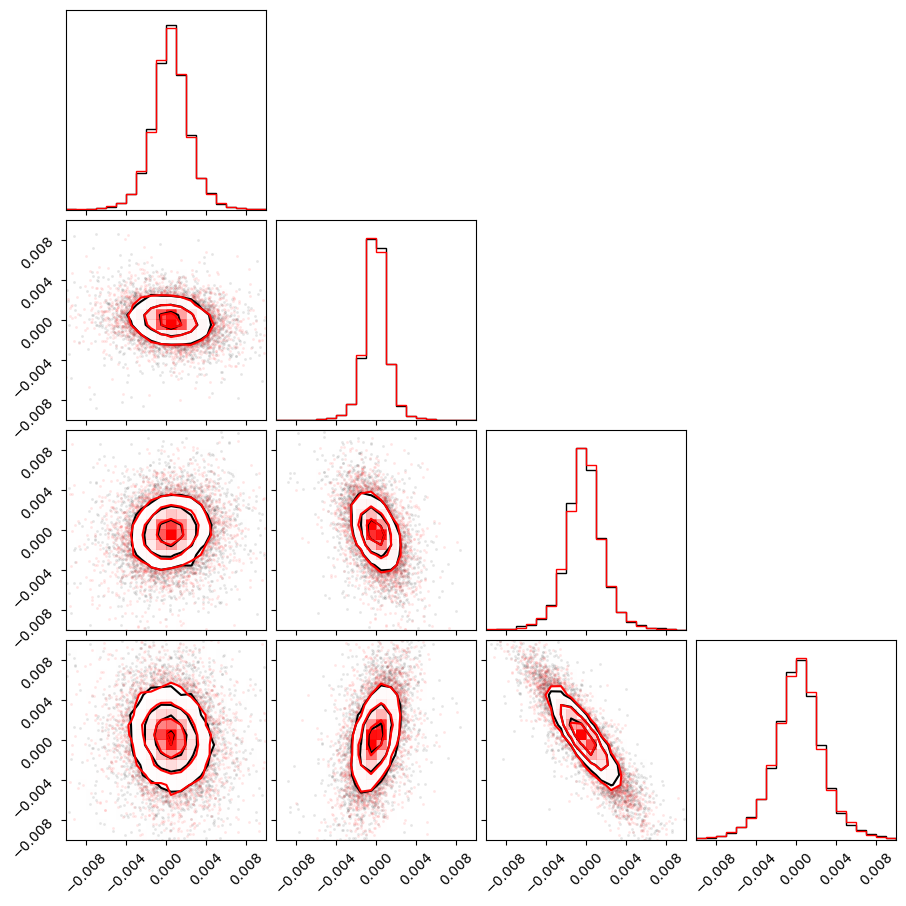

In [132]:
limits = [(-0.01, 0.01)] * 4
fig = corner(np.array(x), range=limits)
fig = corner(np.array(y), color="r", range=limits, fig=fig)

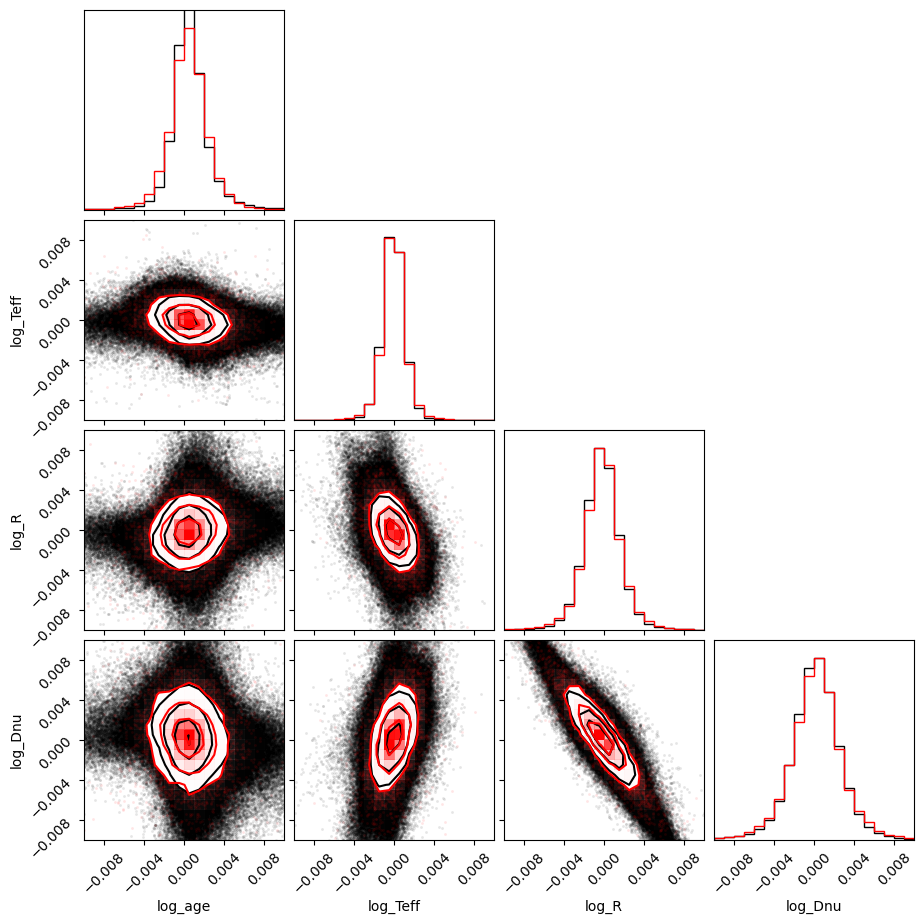

In [138]:
hist_kwargs = dict(density=True)
fig = corner(error, var_names=var_names, range=limits, hist_kwargs=hist_kwargs)
hist_kwargs["color"] = "r"
fig = corner(np.array(y), color="r", range=limits, fig=fig, hist_kwargs=hist_kwargs)

In [93]:
n = 20
d = 4
dim = np.linspace(-0.01*np.ones(d), 0.01, n)
coords = np.stack(np.meshgrid(*dim.T, indexing="ij"), -1).reshape((n**d, d))
log_p = best_fit.log_prob(coords).reshape([n]*d)

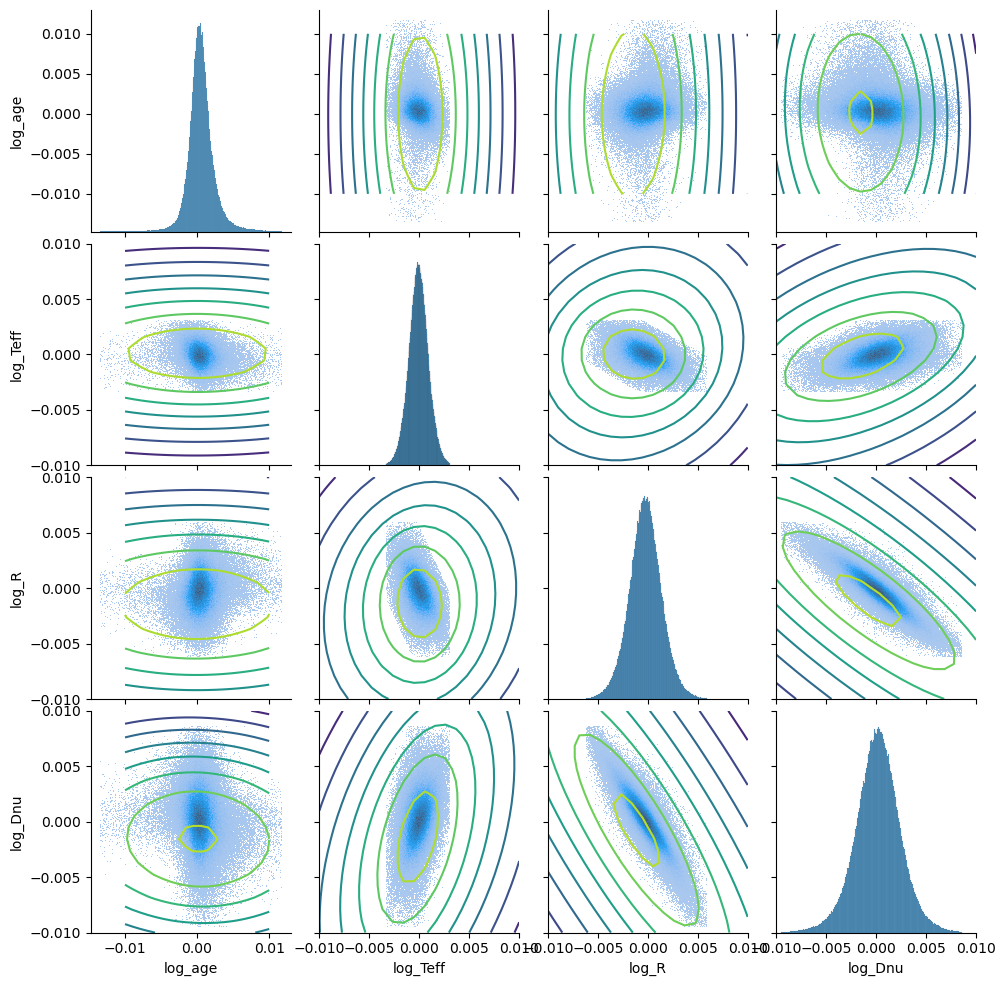

In [94]:
mask = ((error > error.quantile(.005)) & (error < error.quantile(.995))).all(axis=1)
pairgrid = sns.pairplot(error.loc[mask], vars=var_names, kind="hist", diag_kind="hist")  #, plot_kws=kws, diag_kws=kws)

# pairgrid.axes[0, 1].contour(dim[:, 0], dim[:, 1], log_p.sum(axis=(2, 3)))
# pairgrid.axes[1, 2].contour(dim[:, 0], dim[:, 1], log_p.sum(axis=(0, 3)))

for i, ax in enumerate(pairgrid.axes.ravel()):
    row, col = k = i//d, i%d
    if row == col:
        continue
    z = log_p.sum(axis=[j for j in range(d) if j not in k])
    if row > col:
        z = z.T
    ax.contour(dim[:, col], dim[:, row], z)

In [79]:
error_params = {}
for key, value in svi_result.params.items():
    error_params[key[:-9]] = value.tolist()
error_params

{'L_omega': [[[1.0, 0.0, 0.0, 0.0],
   [-0.1093452200293541, 0.9940038323402405, 0.0, 0.0],
   [0.14752569794654846, -0.4115791320800781, 0.8993546962738037, 0.0],
   [-0.12795591354370117,
    0.41253936290740967,
    -0.7489544749259949,
    0.502499520778656]]],
 'df': 4.184734344482422,
 'mu': [0.0005583029706031084,
  0.00010563866817392409,
  -5.0787231884896755e-05,
  0.000325894623529166],
 'theta': [2.4832936560414964e-06,
  8.63221089275612e-07,
  2.2504696062242147e-06,
  4.284335318516241e-06]}

In [81]:
import json

In [84]:
with open("../src/celestify/data/emulator_error.json", "w") as file:
    file.write(json.dumps(error_params, indent=2))

In [96]:
cov = jnp.matmul(L_Omega, jnp.swapaxes(L_Omega, -1, -2)).squeeze()

In [98]:
np.diag(cov)**0.5

array([0.00157585, 0.0009291 , 0.00150016, 0.00206986], dtype=float32)

In [108]:
0.00206986 * np.log(10.0)

0.004766028780584656

In [106]:
0.00150016 * np.log(10.0)

0.003454246053105948

In [107]:
0.0009291 * np.log(10.0)

0.002139331809900768

In [103]:
(4 * 0.00150016**2 + 16 * 0.0009291**2)**0.5 * np.log(10.0)

0.010997959477432383

In [111]:
log_names = ["log_age", "log_Teff", "log_R", "log_Dnu", "log_L", "log_g"]
error[log_names].quantile([.0015, .025, .16, .5, .84, .975, .9985])

,log_age,log_Teff,log_R,log_Dnu,log_L,log_g
0.0015,-0.031186,-0.004293,-0.008834,-0.013526,-0.019776,-0.016952
0.0250,-0.003547,-0.002282,-0.003967,-0.005337,-0.010178,-0.006996
0.1600,-0.000955,-0.001081,-0.001880,-0.002043,-0.004608,-0.002778
0.5000,0.000446,-0.000084,-0.000250,0.000190,-0.000619,0.000500
0.8400,0.002074,0.000912,0.001389,0.002388,0.002892,0.003761
0.9750,0.005509,0.002070,0.003498,0.005284,0.007203,0.007934
0.9985,0.027301,0.003779,0.008476,0.012508,0.015296,0.017669
